In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import uniform, randint


# **Data Loading**

In [3]:
Train=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
Test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# **Exploratory Data Analysis**

In [4]:
#Converting the train dataset in a Pandas dataframe for working purpose
data=pd.DataFrame(Train)

In [5]:
#Here we see the full train dataset
data

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no


In [6]:
#Here we can see first 5 rows of the train dataset
data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [7]:
#Here we can see the last 5 rows of train dataset
data.tail()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no
39210,2010-03-16,51,student,divorced,tertiary,yes,38594,yes,no,cellular,1877,19,780,148,success,yes


In [8]:
#Observivg the shape of train dataset
data.shape

(39211, 16)

**From above we can see that there are 16 columns and 39211 rows in our train dataset**

# **Identify feature type**

In [9]:
#Identifing feature type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

**Here, we can see that there are total 16 columns. Out of those 16 column,the last column is the target column which is categorical and first column is the datetime type column. Out of the rest 14 columns 6 are numerical and rest are categorical.**

> **Analysis for Numerical features**

In [10]:
#Identifing the numerical features
Numerical_feature = data.select_dtypes(include='int64').columns
Numerical_feature

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
#To see the statistical summary of neumerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39211.0,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
balance,39211.0,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0
duration,39211.0,439.062789,769.096291,0.0,109.0,197.0,380.0,4918.0
campaign,39211.0,5.108770,9.890153,1.0,1.0,2.0,4.0,63.0
pdays,39211.0,72.256051,160.942593,-1.0,-1.0,-1.0,-1.0,871.0
previous,39211.0,11.826171,44.140259,0.0,0.0,0.0,0.0,275.0


**age**:
**Mean**: 42.12, with a standard deviation of 12.71, indicating moderate spread around the mean.
**Range**: 18 to 95, showing a wide age range among clients.
**Percentiles**: Median (50%) is 40.

**balance**:
**Mean**: 5441.78, but with a very high standard deviation (16365.29), indicating a wide spread in account balance values.
**Percentiles**: The 25th percentile is 98 and the 75th percentile is 2030, showing a high concentration of values at lower balance.

**duration**:
**Mean**: 439.06, with a high standard deviation of 769.1, indicating high variability in contact durations.
**Range**: 0 to 4918 seconds, with 50% of values below 197 seconds, suggesting many short interactions and a few very long ones.
**Percentiles**: The median is 197 seconds, indicating that the duration is positively skewed, with some long calls extending the maximum

**campaign (number of contacts performed during this campaign)**:
**Mean**: 5.11 with a standard deviation of 9.89, suggesting most clients recieves a few contacts, but some are contacted many times.
**Range**: 1 to 63 contacts.
**Percentiles**: The 50th percentile is 2, which shows that the majority of clients are contacted fewer than the mean number of times.

**pdays (days since the client was last contacted)**:
**Mean**: 72.26, but with a large standard deviation of 160.94, indicating high variability.
**Range**: -1 to 871. A value of -1 represents clients who have not been previously contacted.
**Percentiles**: The 25th, 50th, and 75th percentiles are all -1, confirming that a large proportion of clients have not been previously contacted.

**previous (number of contacts before this campaign)**:
**Mean**: 11.83, with a high standard deviation (44.14), indicating high variability in the number of previous contacts.
**Range**: 0 to 275, suggesting that while some clients have no prior contact, others have been contacted many times.
**Percentiles**: The 50th percentile is 0, meaning most clients had no prior contact before the current campaign.

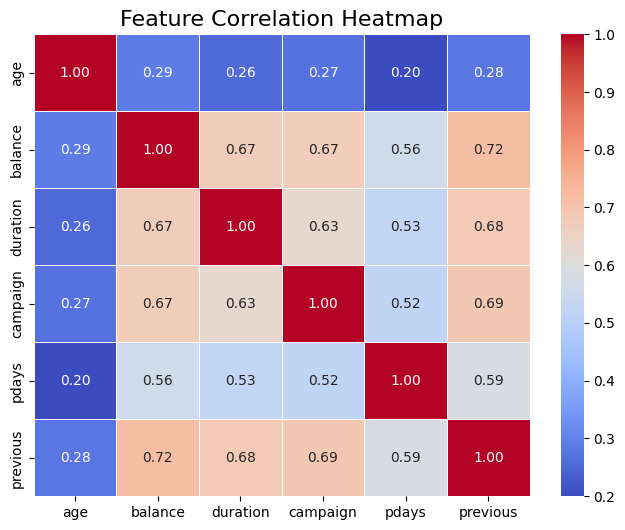

In [12]:
#Here we plot the heatmap to understand the correlation between the numerical features in our 
#dataset.
numerical_data = data.select_dtypes(include=['int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

**The value of correlation coeefficient varies between -1 to +1.**


**1.A correlation coefficient close to +1 means a strong positive correlation that means if one variable increase then the other variable will also increase.**

**2.A correlation coefficient close to -1 means a strong negative correlation that indicates if one variable increase then the other variable decrease and vice versa.**

**3.The value of correlation coefficient equal to 0 indicates there is no linear relationship between the variables.**


**Observation from above heatmap----**

**1.Here we can see that all the correlation coeefficent value is positive.**

**2.So none of the features are negetively correlated.**

**3.The highest value is 0.72 between previous and balance which indicates the person who has higher amount of balance in his bank account is contacted many times previously.**

**4.The lowest value is 0.20 which is between age and pdays incates older clients are somewhat more likely to have been contacted more recently compared to younger clients but the correlation is not strong.**

**5.A positive correlation of 0.68 between previous and duration indicates the bank might be more persistent with customers who have shown some interest, resulting in longer interactions.**

**6. Correlation between balance, duration, campaign, pdays, previous are more than 0.50 in each case**

<Axes: xlabel='balance', ylabel='previous'>

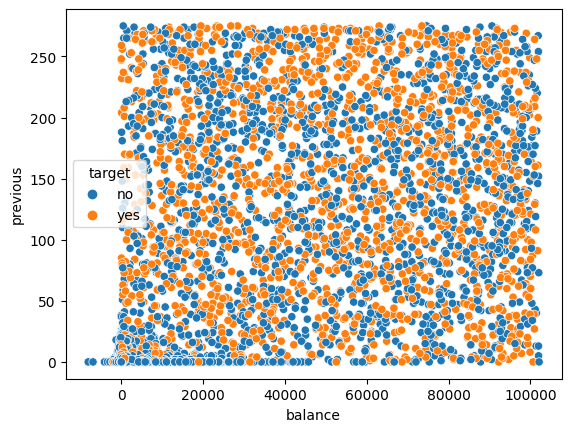

In [13]:
sns.scatterplot(x=data['balance'],y=data['previous'],hue=data['target'])

**1. The plot shows that both subscribed "yes" and "no" clients are spread across a wide range of balances and previous contact counts.**

**2. There is a cluster for amount of balace and previous contact count on lower side for the person who does not subcribe the term deposite.** 

<Axes: xlabel='age', ylabel='pdays'>

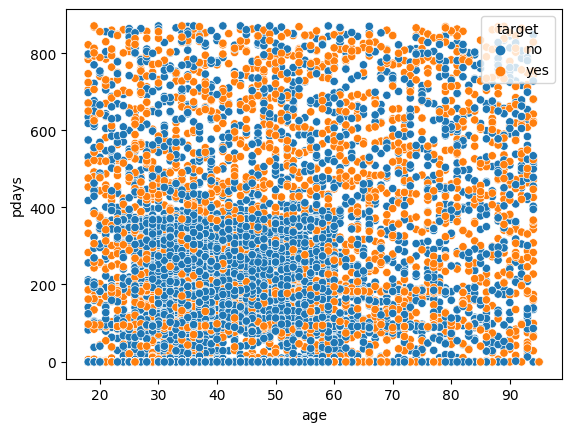

In [14]:
sns.scatterplot(x=data['age'],y=data['pdays'],hue=data['target'])

**1. There is a big cluster of point for the person who does not subscribe the term between age ranges 30-60 and number of days that passed by after the client was last contacted upto 400.**

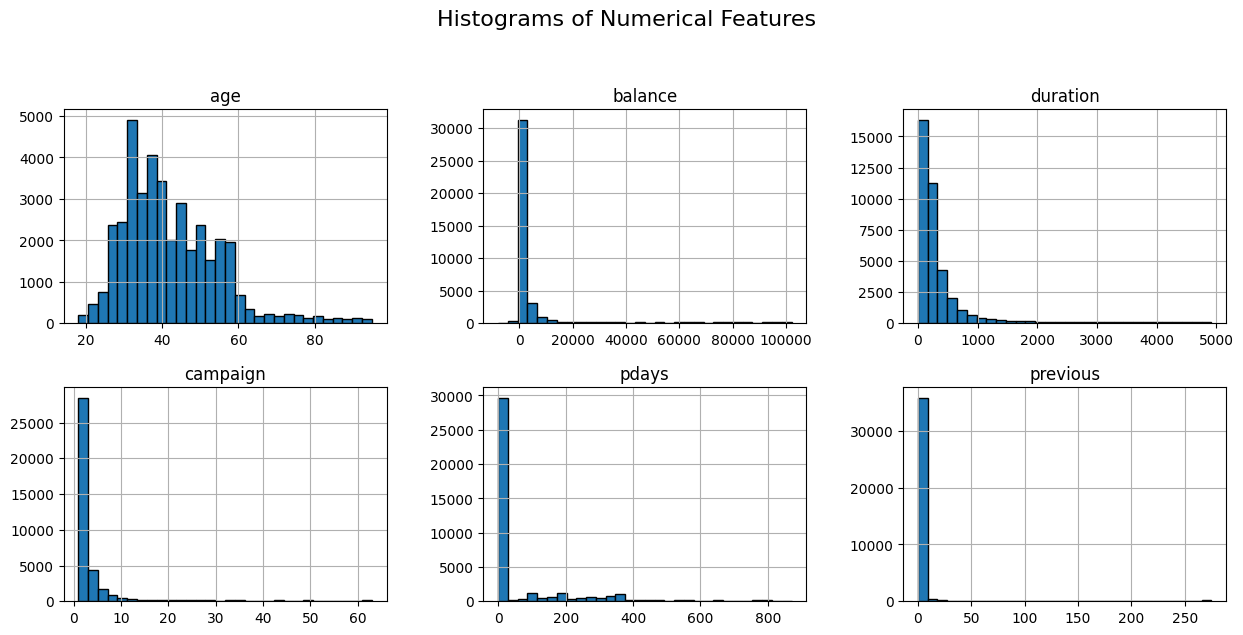

In [15]:
#We plot histogram to view the distribution of data within the column.
numerical_data = data.select_dtypes(include=['int64'])

numerical_data.hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

**1. Age:**

The distribution is right-skewed, indicating that a majority of customers are younger.
There's a peak around the 30-40 age group, suggesting a significant portion of customers fall within this range.

**2. Balance:**

The distribution is heavily right-skewed, with a long tail towards higher balances.
Most customers have relatively low balances, while a small number have significantly higher balances.

**3. Duration:**

The distribution is also right-skewed, with a long tail towards longer durations.
Most customer interactions are relatively short, while a few interactions last significantly longer.

**4. Campaign:**

The distribution is right-skewed, with a peak at lower campaign values.
Most customers are contacted a few times, while a smaller number are contacted more frequently.

**5. Pdays:**

The distribution is heavily right-skewed.(peak at -1)
This indicates that a significant number of customers have not been contacted before.

**6. Previous:**

The distribution is also right-skewed, with a peak at 0.
This indicates that most customers have not been contacted in previous campaigns.

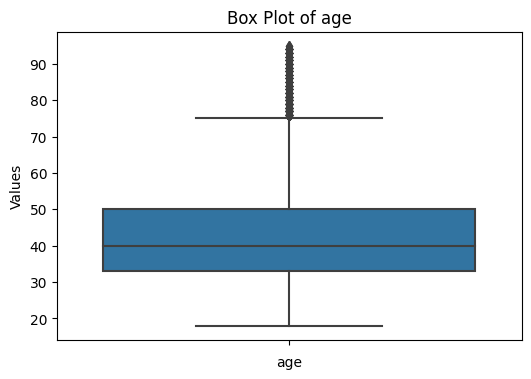

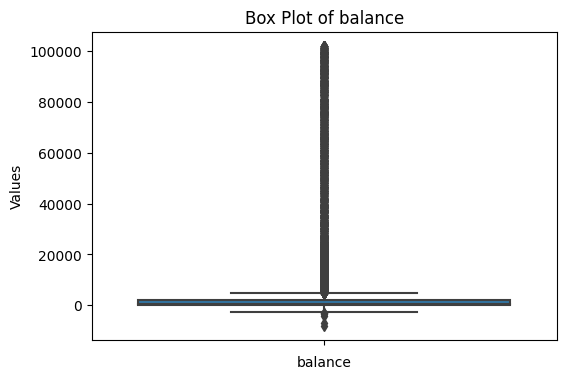

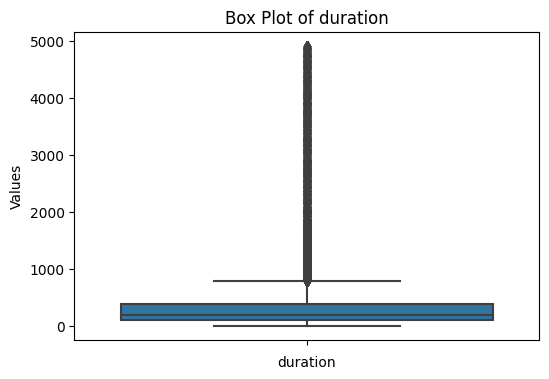

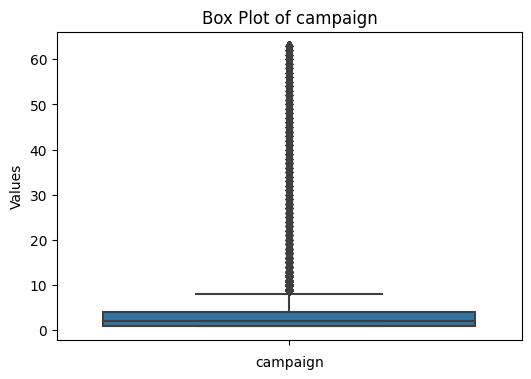

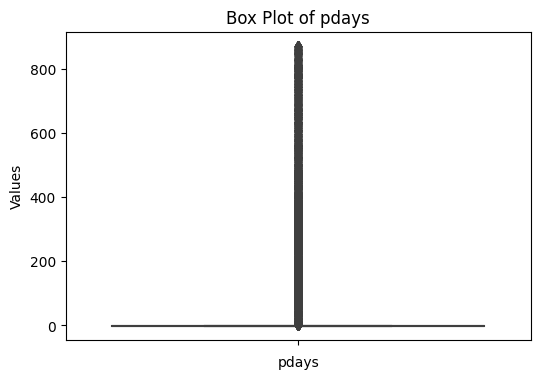

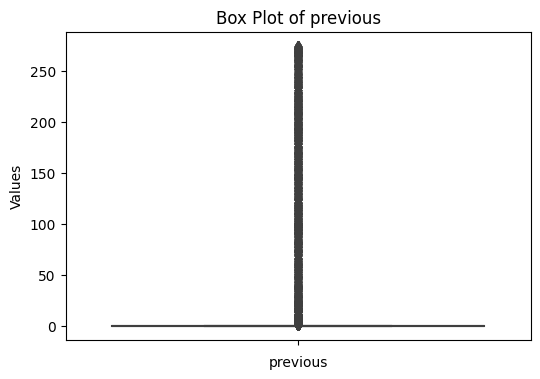

In [16]:
#We plot box plot to observe the outlier in each numerical column.
numerical_columns = data.select_dtypes(include='int64').columns
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column])
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

**From the above box plot we can observe that------**

**1.Every column have many outlier. With respect to other column Age column have less number of
outlier.**

**2.The box plot of previos and pdays column looks like that because from data.describe() we can see that 25,50 and 75 parcentile value is same for these column.**

> **Analysis for Categorical features**

In [17]:
#Identifing the categorical features.
Categorical_feature = data.select_dtypes(include='object').columns[1:]
Categorical_feature

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'target'],
      dtype='object')

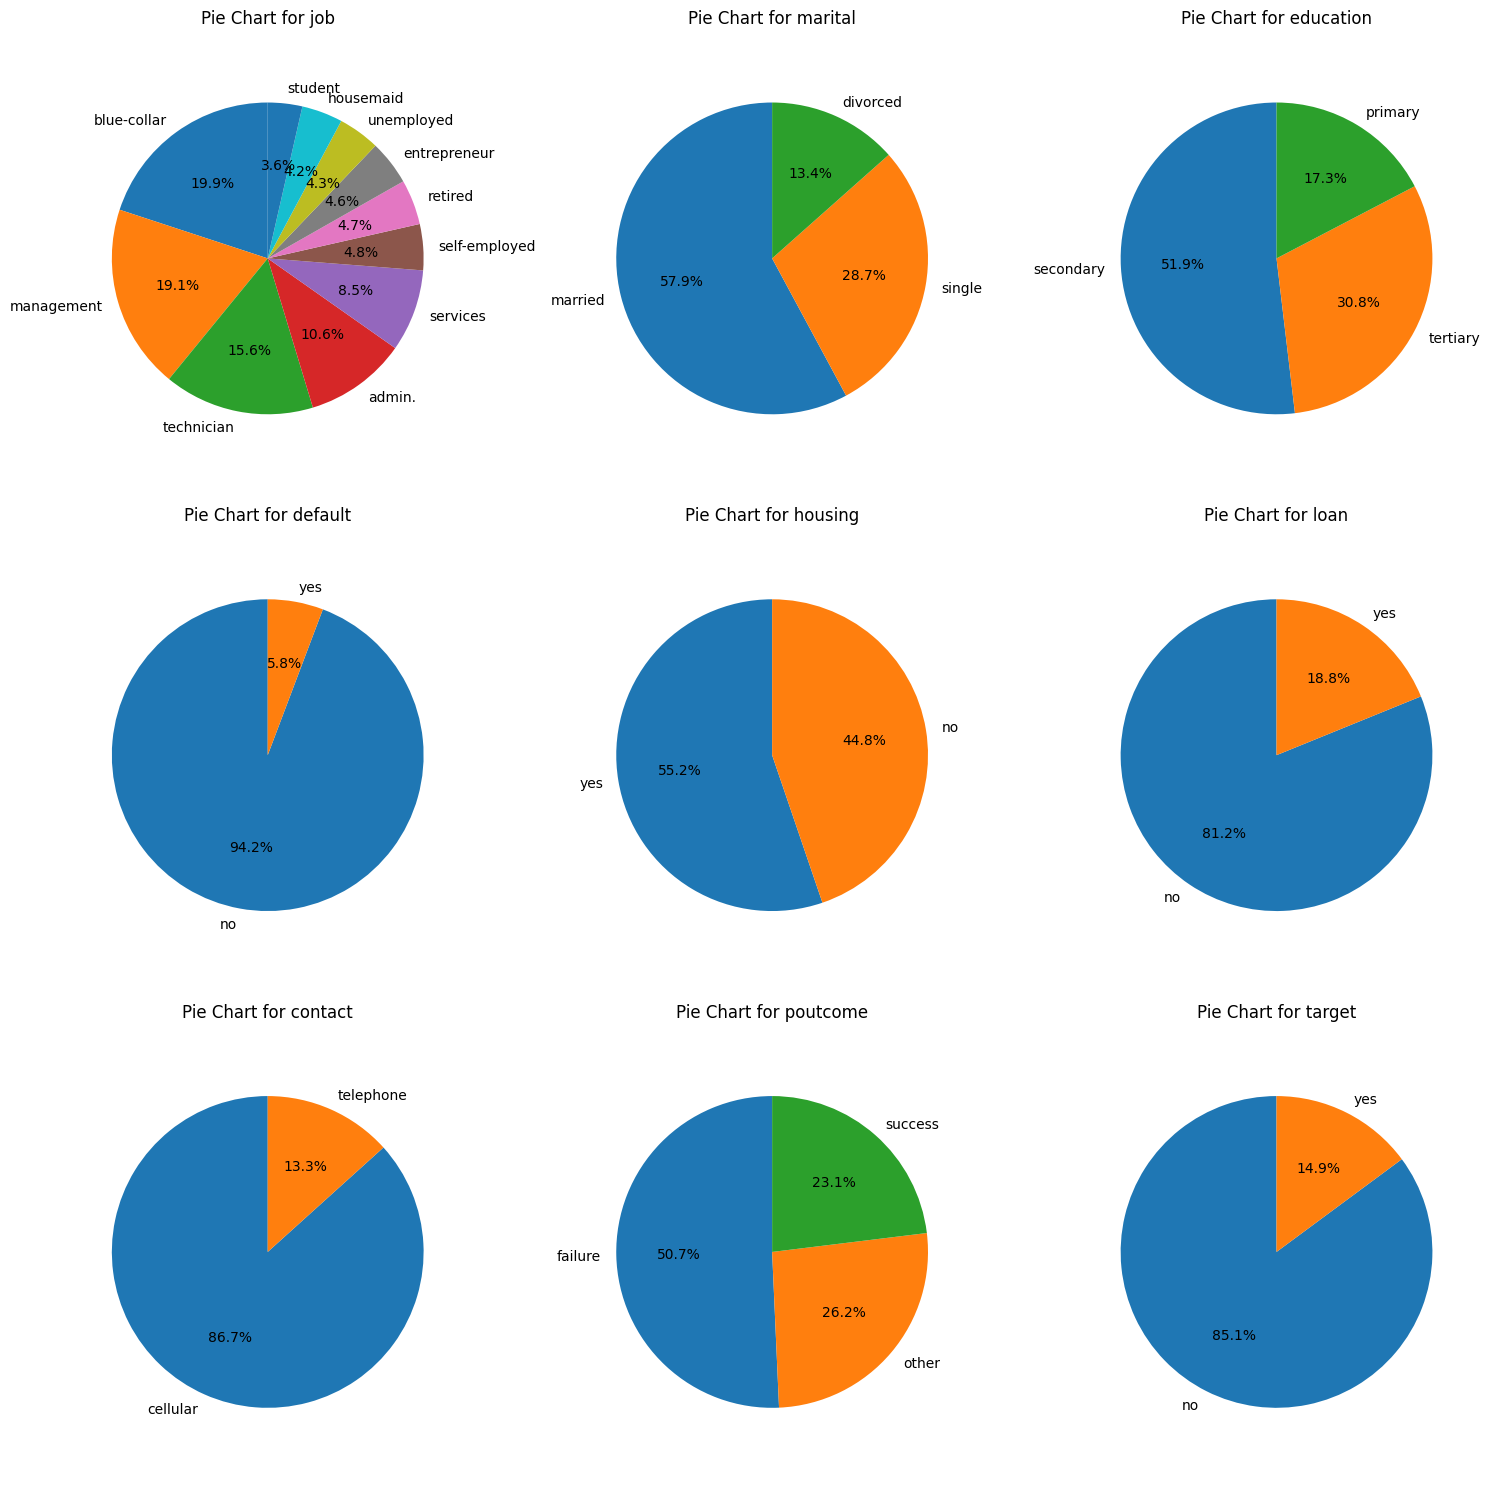

In [18]:
#To obeserve the number of different category and percentage of share of each different category
#in existing data in every categorical column we plot pie chart.
num_columns = len(Categorical_feature)
num_rows = (num_columns + 2) // 3
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(Categorical_feature):
    value_counts = data[column].value_counts()
    plt.subplot(num_rows, 3, i + 1)  
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {column}')
    plt.axis('equal')
plt.tight_layout()
plt.show()


**Job:**

There are total 11 different type of category. "Blue-collar" and "management" are the most common job categories, each representing around 20% of the dataset."Technician" and "admin." also have a significant presence, each accounting for about 10% of the data.
Other categories like "services," "self-employed," and "retired" have smaller proportions.

**Marital:**

There are 3 different category. "Married" is the dominant category, comprising around 58% of the dataset.

**Education:**

"Secondary" education is the most prevalent, accounting for over 50% of the dataset."Tertiary" education's share of around 30%."Primary" education is the least common category.

**Default:**

The majority (over 90%) of individuals have not defaulted on credit. Only a small fraction (less than 10%) have defaulted.

**Housing:**

Almost 55% people have housing loan.

**Loan:**

The majority (over 80%) of individuals do not have a personal loan.A smaller proportion (around 20%) have a personal loan.

**Contact:**

"Cellular" is the most common contact method."Telephone" is used for the remaining.

**Poutcome:**

In existing data"Failure" is the most common outcome of previous marketing campaigns. "Success" and "other" have smaller proportions.

**Target:**

Target is the output column of our train data. From this we can see that majority (over 80%) of individuals did not subscribe to a term deposit. A smaller proportion (around 20%) did subscribe. **So, from this we can say that there is class imbalnce in our given train dataset.** 

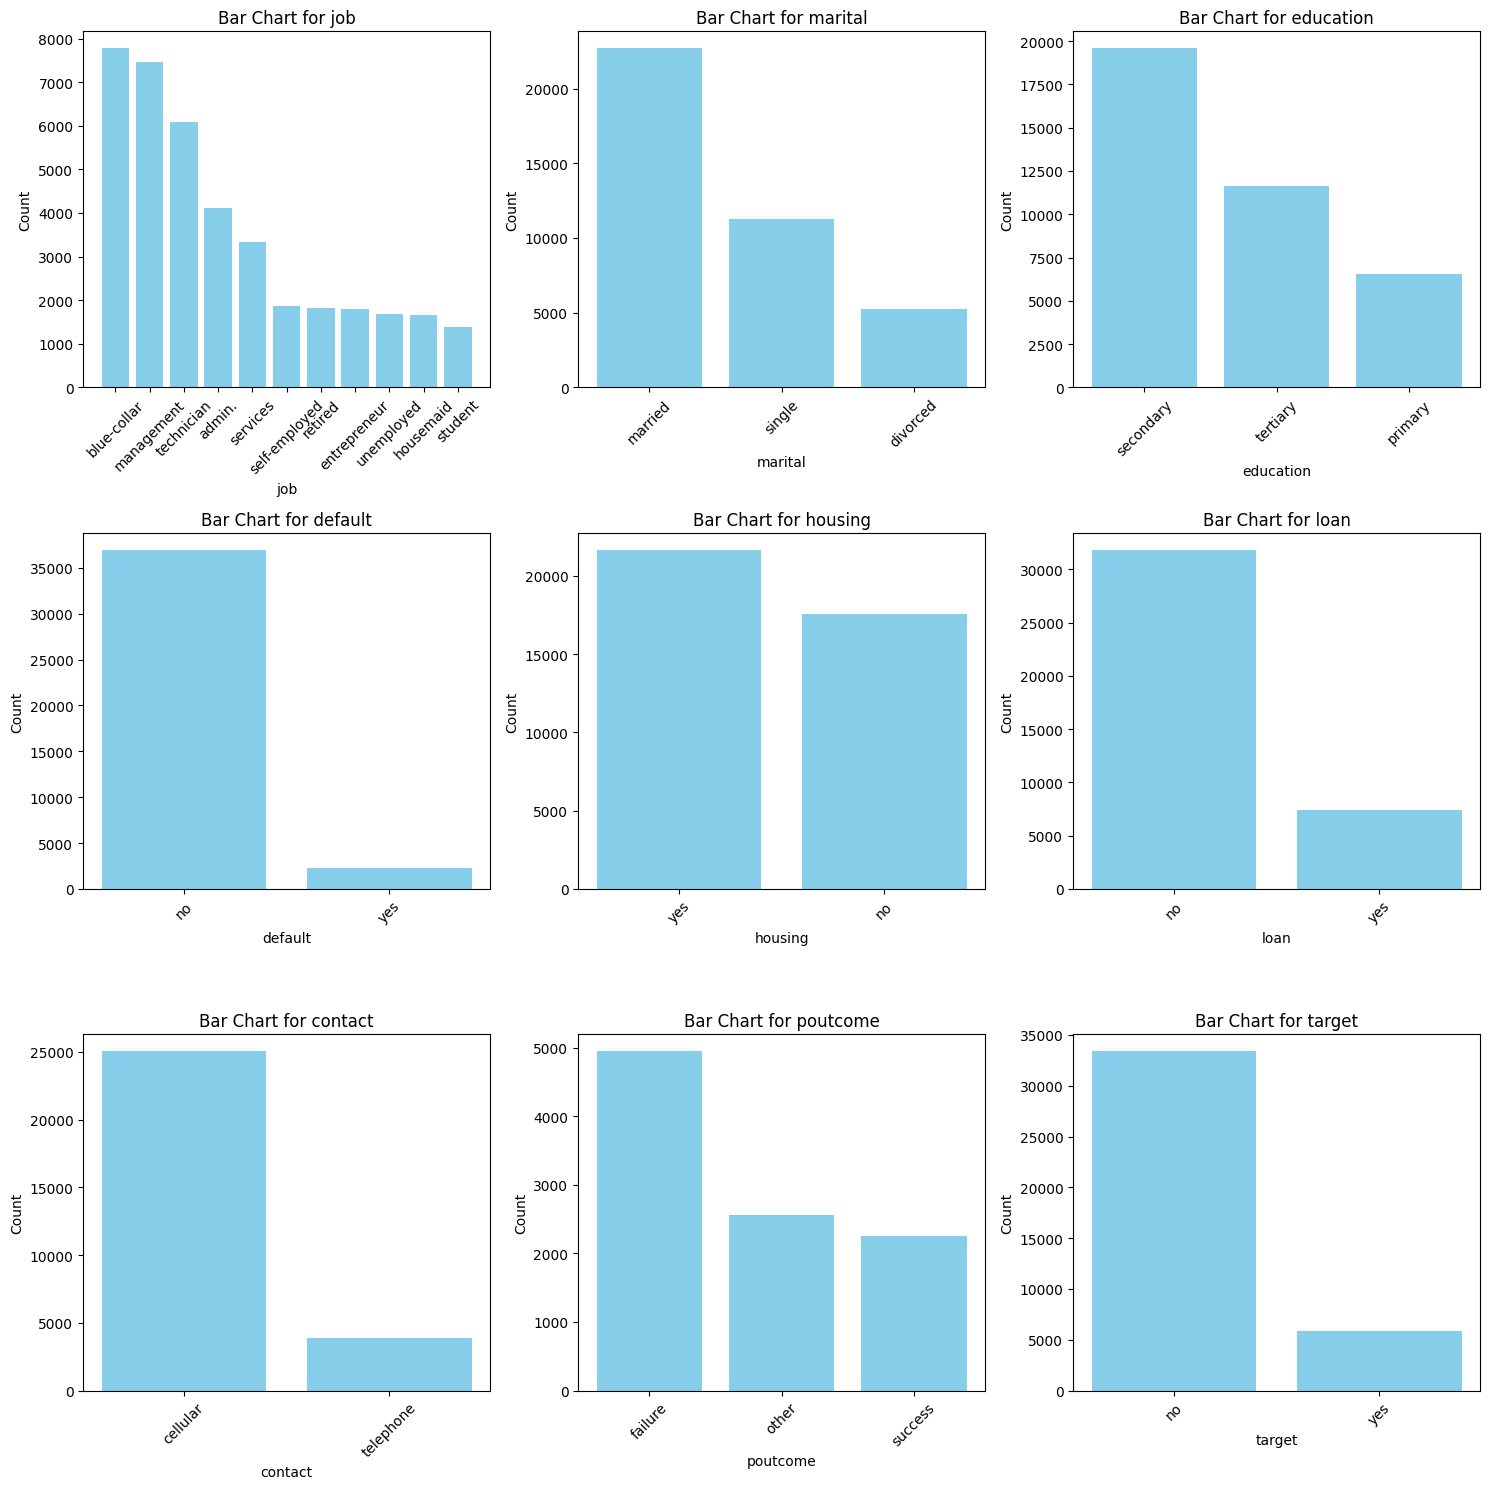

In [19]:
#To observe the count of different category present in each categorical column we plot bar chart.
num_columns = len(Categorical_feature)
num_rows = (num_columns + 2) // 3
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(Categorical_feature):
    value_counts = data[column].value_counts()
    plt.subplot(num_rows, 3, i + 1)
    plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**In above pie chart we see the parcentage share of each category in each categorical column but here we can see the excact count of each category in each categorical column.**

In [20]:
# Chi-square statistic between each categorical feature in Categorical_feature and the target variable (target). 
#This helps to assess the association strength between each categorical feature and the target.
chi2_scores = {}
for column in Categorical_feature:
    contingency_table = pd.crosstab(data[column], data['target']) 
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_scores[column] = chi2

chi2_df = pd.DataFrame(list(chi2_scores.items()), columns=['Feature', 'Chi-Square']).sort_values(by='Chi-Square', ascending=False)
print(chi2_df)

     Feature    Chi-Square
8     target  39203.096662
0        job   1951.401299
7   poutcome   1073.328172
3    default    993.548705
4    housing    654.262201
1    marital    406.332801
6    contact    256.953341
2  education    181.141871
5       loan     18.708261


**Job:** With a Chi-square score of 1,951.4, the job feature has the strongest association with the target variable among the features. This suggests that certain job categories may have a stronger influence on the target outcome.

**Poutcome:** The poutcome (previous outcome) feature has a high Chi-square score of 1,073.3, indicating a strong relationship with the target variable. This suggests that the outcome of previous campaigns is predictive of the target outcome in this case.

**Default:** The default feature (whether the client has credit in default) has a score of 993.5, also indicating a significant relationship with the target. This could mean that clients with a history of default may exhibit different behavior relevant to the target variable.

**Housing:** The housing feature (whether the client has a housing loan) has a score of 654.3, suggesting a moderate association with the target. This could imply that housing loan status might impact the target outcome to some extent.

**Marital:** The marital status feature has a Chi-square score of 406.3, showing a weaker, though still notable, relationship with the target variable.

**Contact:** With a Chi-square score of 256.9, contact (communication type) has a weaker association with the target variable but still provides some predictive information.

**Education:** The education feature has a Chi-square score of 181.1, suggesting a relatively weaker association with the target.

**Loan:** The loan feature (whether the client has a personal loan) has the lowest Chi-square score at 18.7. This indicates a weak association with the target.

# Detecting Missing Data 

In [21]:
#To detect the missing value
data.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

**From above we can see that there are missing values in several column. in Job column there are least number of missing value and for the column poutcome there are most number of missing value.**

# Fearure engineering

In [22]:
data['last contact date'] = pd.to_datetime(data['last contact date'])
data['Year'] = data['last contact date'].dt.year
data['Month'] = data['last contact date'].dt.month
data['Day'] = data['last contact date'].dt.day

**In this step, I have converted the 'last contact date' column to a datetime format using pd.to_datetime(). Then, I extracted three new features from the date:**

**Year:** The year part of the date.

**Month:** The month part of the date.

**Day:** The day of the month part of the date.

These new features help in capturing trends across different date, months and years.

In [23]:
data.shape

(39211, 19)

**Here we can see that after doing feature engineering the number of column in our dataset increased to 19 from 16.**

In [24]:
#data['previously_contacted'] = data['pdays'].apply(lambda x: 0 if x == -1 else 1)

**1. Here I converted the 'pdays' column into 'previously_contacted'.**

**2. Where the value is -1 that means the person is not contacted previously converted to 0 and other converted to 1.** 

**3. But I saw that by this feature engineering I am getting less score in main test set which is 0.76287.**

**4. The reason maybe---Using -1 in the pdays column is beneficial because it directly indicates clients with no previous contact, preserving valuable information that may impact customer behavior. Since I use Tree-based models like Random Forest and XGBClassifier which can treat -1 as a distinct value, allowing the model to capture patterns between contacted and non-contacted clients without any transformations.**

# Converting the dataset in train set and target column

In [25]:
X = data.drop(columns=['target','Year','last contact date'])
y = data['target'].apply(lambda x: 1 if x == 'yes' else 0)

**Features (X):** I dropped the 'target' and 'last contact date' columns from the dataset.(Since I have done feature engineering in last contact date column thatswhy I drop that also). I also drop 'Year' column after hit and trail method.

**Target (y):** I converted the 'target' column into a binary format using apply() and a lambda function because we will not be able to work with yes and no in modelling time. The values are transformed such that 'yes' is mapped to 1 and 'no' is mapped to 0.

In [26]:
print(X.shape)
print(y.shape)

(39211, 16)
(39211,)


**We can see that there are 16 column in our features matrix X since we drop 3 columns.**

# Splitting the feature matrix X and target y in train and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**The stratify=y argument ensures that the distribution of the target variable (y) is preserved in both the training and testing set.**

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31368, 16)
(31368,)
(7843, 16)
(7843,)


**After spitting in train and test we can see that there are 31368 data points in our train set and there are 7843 data points in our test set.**

# Observing the count and percentage of 0 and 1 in original y, train y and test y

In [29]:
print("Target (y) distribution:")
print(y.value_counts())
print("\nTraining set (y_train) distribution:")
print(y_train.value_counts())
print("\nTesting set (y_test) distribution:")
print(y_test.value_counts())

Target (y) distribution:
target
0    33384
1     5827
Name: count, dtype: int64

Training set (y_train) distribution:
target
0    26707
1     4661
Name: count, dtype: int64

Testing set (y_test) distribution:
target
0    6677
1    1166
Name: count, dtype: int64


In [30]:
print("Target (y) distribution:")
print(y.value_counts(normalize=True) * 100)

print("\nTraining set (y_train) distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTesting set (y_test) distribution:")
print(y_test.value_counts(normalize=True) * 100)


Target (y) distribution:
target
0    85.139374
1    14.860626
Name: proportion, dtype: float64

Training set (y_train) distribution:
target
0    85.140908
1    14.859092
Name: proportion, dtype: float64

Testing set (y_test) distribution:
target
0    85.13324
1    14.86676
Name: proportion, dtype: float64


**Since we use stratify=y in splitting thats why we are getting percentage of 0 and 1 same in train and test.**

# Imputation of missing value and preprocess the dataset by scaling numerical features and encoding categorical features with pipeline and column transformer.

In [31]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing','loan','contact', 'poutcome']
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'Month', 'Day']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))  
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]).set_output(transform='pandas')

**A numeric transformer pipeline was created to:**

Impute missing values using the mean (with SimpleImputer).

Scale the features using StandardScaler to standardize them (zero mean, unit variance).

**A categorical transformer pipeline was created to:**

Impute missing values using the most frequent category (with SimpleImputer).

Apply OneHotEncoder to create one-hot encoded variables, dropping the first category to avoid multicollinearity.

**ColumnTransformer:**

I used a ColumnTransformer to apply the numeric and categorical transformations to the respective features in the dataset. The numeric features are processed with the numeric transformer, and the categorical features are processed with the categorical transformer.

In [32]:
#I applied the preprocessing pipeline to X_train using fit_transform() and to X_test using 
#transform() to preprocess both datasets consistently.
x_train_p=preprocessor.fit_transform(X_train)
x_test_p=preprocessor.transform(X_test)

In [33]:
#this is the transformed train dataset.
x_train_p

,num__age,num__balance,num__duration,num__campaign,num__pdays,num__previous,num__Month,num__Day,cat__job_blue-collar,cat__job_entrepreneur,...,cat__marital_married,cat__marital_single,cat__education_secondary,cat__education_tertiary,cat__default_yes,cat__housing_yes,cat__loan_yes,cat__contact_telephone,cat__poutcome_other,cat__poutcome_success
11002,-0.563542,0.085205,-0.389636,0.291136,1.261232,-0.107935,-1.622248,-1.174192,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
16008,0.928972,-0.308757,-0.310195,-0.415218,-0.455273,-0.266769,-0.471729,1.340325,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24722,-1.663289,-0.319059,-0.031501,-0.415218,-0.455273,-0.266769,0.678789,-1.293931,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1722,-0.799202,0.419997,-0.387031,-0.415218,-0.455273,-0.266769,-0.471729,0.023197,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21374,-0.092222,-0.336105,-0.499030,-0.314310,-0.455273,-0.266769,-0.471729,-1.293931,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,0.771865,-0.306059,-0.371403,-0.415218,-0.455273,-0.266769,-0.471729,1.699542,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23322,-1.113415,0.495785,0.917881,2.309288,3.986340,1.639231,-2.005754,-0.934714,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3638,-0.406435,-0.235422,-0.450844,0.694766,-0.455273,-0.266769,0.678789,0.741631,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20677,-1.113415,-0.306366,-0.251591,-0.415218,-0.455273,-0.266769,0.295283,0.861370,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
x_train_p.info()
#Here we can see that all the the column are correctly converted.

<class 'pandas.core.frame.DataFrame'>
Index: 31368 entries, 11002 to 38130
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num__age                  31368 non-null  float64
 1   num__balance              31368 non-null  float64
 2   num__duration             31368 non-null  float64
 3   num__campaign             31368 non-null  float64
 4   num__pdays                31368 non-null  float64
 5   num__previous             31368 non-null  float64
 6   num__Month                31368 non-null  float64
 7   num__Day                  31368 non-null  float64
 8   cat__job_blue-collar      31368 non-null  float64
 9   cat__job_entrepreneur     31368 non-null  float64
 10  cat__job_housemaid        31368 non-null  float64
 11  cat__job_management       31368 non-null  float64
 12  cat__job_retired          31368 non-null  float64
 13  cat__job_self-employed    31368 non-null  float64
 14  cat__jo

In [35]:
#To see the shape of train dataset after preprocessing
x_train_p.shape

(31368, 28)

In [36]:
x_train_p.isnull().sum()
#To check that all the missing value are imputed correctly.

num__age                    0
num__balance                0
num__duration               0
num__campaign               0
num__pdays                  0
num__previous               0
num__Month                  0
num__Day                    0
cat__job_blue-collar        0
cat__job_entrepreneur       0
cat__job_housemaid          0
cat__job_management         0
cat__job_retired            0
cat__job_self-employed      0
cat__job_services           0
cat__job_student            0
cat__job_technician         0
cat__job_unemployed         0
cat__marital_married        0
cat__marital_single         0
cat__education_secondary    0
cat__education_tertiary     0
cat__default_yes            0
cat__housing_yes            0
cat__loan_yes               0
cat__contact_telephone      0
cat__poutcome_other         0
cat__poutcome_success       0
dtype: int64

# **Feature Extraction**

In [37]:
#Here we will extract top 25 features
selector = SelectKBest(k=25)
x_train_p_selected = selector.fit_transform(x_train_p, y_train)
x_test_p_selected = selector.transform(x_test_p)
selected_features = selector.get_support(indices=True)
selected_feature_names = x_train_p.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['num__age', 'num__balance', 'num__duration', 'num__campaign',
       'num__pdays', 'num__previous', 'num__Month', 'cat__job_blue-collar',
       'cat__job_entrepreneur', 'cat__job_housemaid', 'cat__job_retired',
       'cat__job_self-employed', 'cat__job_services', 'cat__job_student',
       'cat__job_technician', 'cat__job_unemployed', 'cat__marital_married',
       'cat__marital_single', 'cat__education_secondary',
       'cat__education_tertiary', 'cat__default_yes', 'cat__housing_yes',
       'cat__contact_telephone', 'cat__poutcome_other',
       'cat__poutcome_success'],
      dtype='object')


**1. This code identifies the top 25 most important features in my dataset, applies this selection to both the training and test data. Finally, it prints the names of these selected features.**

**2. Three column which are removed as follows-----num__Day, cat__job_management, cat__loan_yes**

# **MODEL-1(Logistic Regression)**

In [38]:
model2 = LogisticRegression(random_state=42)

model2.fit(x_train_p, y_train)

y_pred = model2.predict(x_test_p)

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

F1 Score: 0.63
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.59      0.24      0.34      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.61      0.63      7843
weighted avg       0.84      0.86      0.84      7843



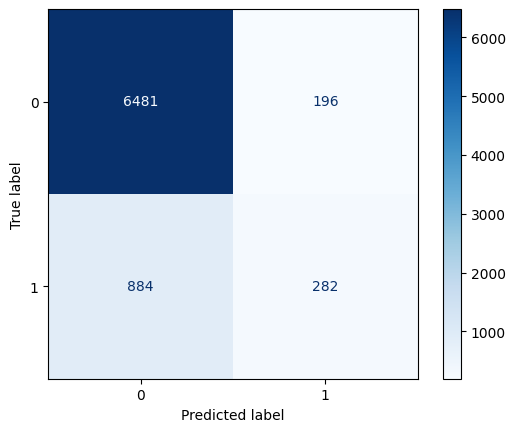

In [39]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
cm_display.plot(cmap='Blues')

plt.show()

**1. From above we can see that our 1st model Logistic regression gives 0.63 f1(avg='macro') score in test set.**

**2. Out of 6677 of class 0, 97% are classified correctly but for 1 class only 24% are classified correctly.**

>  **Logistic Regression with hyper parameter tuning**

In [40]:
model2=LogisticRegression(random_state=42)

param_grid = {'C': [0.01, 0.1, 1],'solver': ['liblinear', 'saga'],'max_iter': [100, 200, 300]}

grid_search2 = GridSearchCV(model2, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=0)

grid_search2.fit(x_train_p, y_train)

print("Best Parameters: ", grid_search2.best_params_)

y_pred = grid_search2.predict(x_test_p)

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
F1 Score: 0.63
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.59      0.24      0.34      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.61      0.63      7843
weighted avg       0.84      0.86      0.84      7843



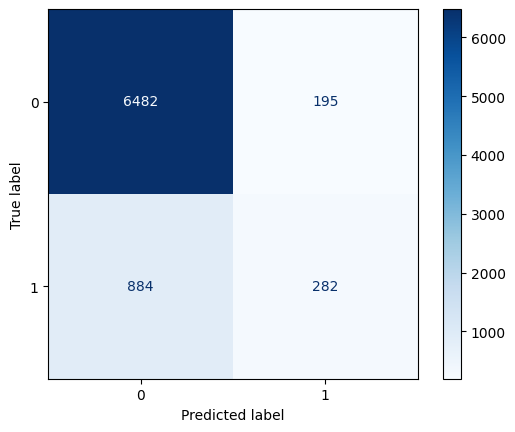

In [41]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search2.classes_)
cm_display.plot(cmap='Blues')
plt.show()

**1. To improve the performance of the above model I use hyper parameter tuning. But we can see that the performance of our model has not increase.**

**2. So we can conclude that this model is not performing well in our dataset.**

In [42]:
lr_model=grid_search2.best_estimator_

In [43]:
lr_model

LogisticRegression(C=1, random_state=42, solver='liblinear')

> **Logistic Regression with extracted feature**

In [44]:
mod = LogisticRegression(random_state=42)

mod.fit(x_train_p_selected, y_train)

y_p = mod.predict(x_test_p_selected)
f1 = f1_score(y_test, y_p, average='macro')

print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, y_p))

F1 Score: 0.63
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.59      0.24      0.34      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.61      0.63      7843
weighted avg       0.84      0.86      0.84      7843



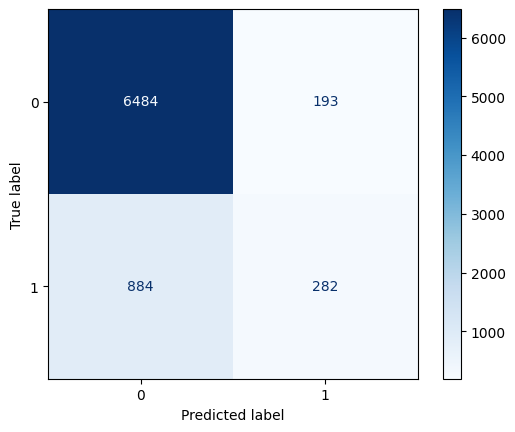

In [45]:
cm = confusion_matrix(y_test, y_p)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod.classes_)
cm_display.plot(cmap='Blues')

plt.show()

**1. Here we build our model with top 25 features. But our model is performing like previous only.**

**2. There is not any kind of improvement in the performance.**

**3. The number of corretly classified points are almost similar in each cases.**

**$. So we can surely conclude that Logistic Regression is ideal for our dataset.**

# **MODEL-2(Random Forest)**

In [46]:
model1=RandomForestClassifier(random_state=42, class_weight='balanced')

#Sice our data set is class imbalanced thats why setting class_weight='balanced',the model will 
#assign higher weight to minor Class to ensure it is treated with equal importance during training.

model1.fit(x_train_p, y_train)

y_pred =model1.predict(x_test_p)

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

F1 Score: 0.68
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6677
           1       0.63      0.34      0.44      1166

    accuracy                           0.87      7843
   macro avg       0.76      0.65      0.68      7843
weighted avg       0.85      0.87      0.86      7843



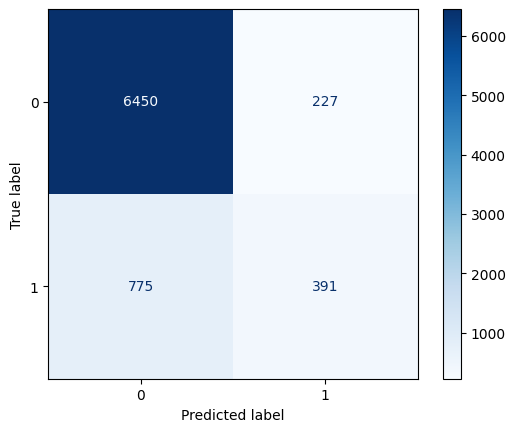

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
cm_display.plot(cmap='Blues')
plt.show()

**1. We can see that in the above model I am getting score of 0.68 in test set which is an improved score with respect to our previous model.**

**2. Almost 97% of class 0 data points are classified correctly and 34% of class 1 data points are classified correctly.**

> **Random Forest with hyper parameter tuning**

In [48]:
model1=RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid ={'n_estimators': [100, 200],'max_depth': [10, 20],'min_samples_split': [2, 10],'min_samples_leaf': [1, 4]}

grid_search1 = GridSearchCV(model1, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)

grid_search1.fit(x_train_p, y_train)

print("Best Parameters: ", grid_search1.best_params_)

y_pred = grid_search1.predict(x_test_p)

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
F1 Score: 0.77
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      6677
           1       0.52      0.81      0.63      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.84      0.77      7843
weighted avg       0.90      0.86      0.87      7843



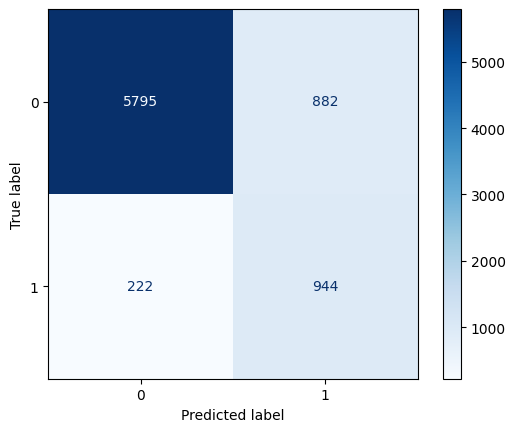

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search1.classes_)
cm_display.plot(cmap='Blues')
plt.show()

**1. We can see that there is a significant increase in score after doing hyperparameter tuning.**

**2. Another significant observation is that our model is performing good for minor class also. Almost 81% of data pints from minor class is classified correctly.**

In [50]:
rf_model=grid_search1.best_estimator_

In [51]:
rf_model

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

# **MODEL-3(XGBClassifier)**

In [52]:
model3=XGBClassifier(random_state=42)

model3.fit(x_train_p, y_train)

y_pred = model3.predict(x_test_p)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)
print(classification_report(y_test, y_pred))

0.7306830924994393
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6677
           1       0.59      0.48      0.53      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.71      0.73      7843
weighted avg       0.87      0.87      0.87      7843



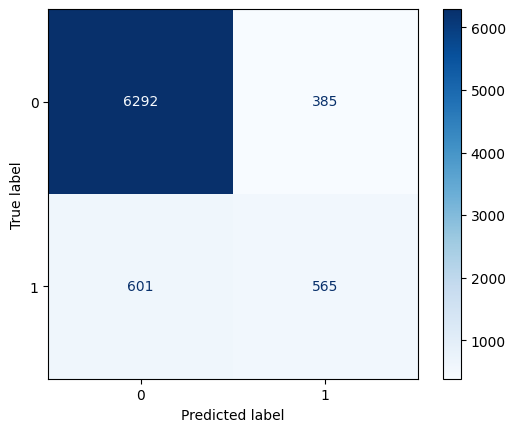

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
cm_display.plot(cmap='Blues')
plt.show()

**1. Here I am getting 0.73 score.**

**2. Our model performes good in major class but we need to improve the performance of our model for minor class also.**

> **XGBClassifier with hyper parameter tuning**

In [54]:
model=XGBClassifier(random_state=42, scale_pos_weight=2,subsample=.7)
param_grid = {'n_estimators': [100,200],'learning_rate': [0.1, 0.5],'max_depth': [5,10,20],'min_child_weight':[5,1]}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=0)

grid_search.fit(x_train_p, y_train)

print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


**scale_pos_weight=2:** This is used to handle class imbalance in the dataset. By setting the scale_pos_weight to 2, I am increasing the weight of the minority class which makes my model more sensitive to the minority class.

**subsample=0.7:** This parameter controls the fraction of samples to be used for training each tree. Setting it to 0.7 means the model will randomly sample 70% of the training data to build each tree, which helps prevent overfitting by introducing randomness into the training process.

In [55]:
y_pred1 = grid_search.predict(x_test_p)
f1 = f1_score(y_test, y_pred1, average='macro')
print(f1)
print(classification_report(y_test, y_pred1))

0.7739277154489068
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      6677
           1       0.55      0.73      0.63      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.81      0.77      7843
weighted avg       0.89      0.87      0.88      7843



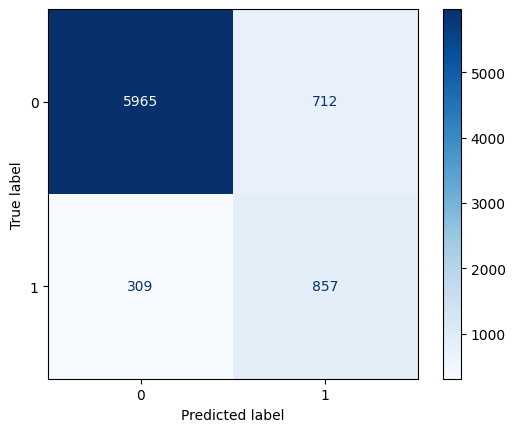

In [56]:
cm = confusion_matrix(y_test, y_pred1)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
cm_display.plot(cmap='Blues')
plt.show()

**1. From this model we can see that our model is giving almost 0.77 score in validation set.**

**2. Our model performe well for major class and improve its performance for minor class also.**

In [57]:
xg_model=grid_search.best_estimator_

In [58]:
xg_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

> **Below I try some more hyper parameter tuning for XGBClassifier model. But I got best score with the above model, out of all.**

In [59]:
#model = XGBClassifier(random_state=42)
#param_dist = {'n_estimators': randint(100, 500),'learning_rate': uniform(0.01, 0.1),
#    'max_depth': randint(3, 15),'min_child_weight': randint(1, 10),'gamma': uniform(0, 0.5),
#    'subsample': uniform(0.6, 0.4),'colsample_bytree': uniform(0.6, 0.4),'reg_alpha': uniform(0, 1),
#    'reg_lambda': uniform(0, 1),'scale_pos_weight': randint(1, 5)}

#grid_search = RandomizedSearchCV(
#    model, param_distributions=param_dist, n_iter=100, cv=5,
#    scoring='f1_macro', n_jobs=-1, verbose=1, random_state=42,
#    refit=True)

#grid_search.fit(x_train_p, y_train)  

#best_model = grid_search.best_estimator_

#print("Best Parameters: ", grid_search.best_params_)


#Got score 0.75653

In [60]:
#model = XGBClassifier(random_state=42)

#param_dist = {'n_estimators': randint(100, 500),'learning_rate': uniform(0.01, 0.1),
#    'max_depth': randint(3, 15),'min_child_weight': randint(1, 10),
#    'gamma': uniform(0, 0.5),'subsample': uniform(0.6, 0.4),'colsample_bytree': uniform(0.6, 0.4),
#    'reg_alpha': uniform(0, 1),'reg_lambda': uniform(0, 1),'scale_pos_weight': randint(1, 5)}

#grid_search = RandomizedSearchCV(model,param_distributions=param_dist,n_iter=100,cv=3, 
#    scoring='f1_macro', n_jobs=-1, verbose=1, random_state=42)

#grid_search.fit(x_train_p, y_train)

#print("Best Parameters: ", grid_search.best_params_)

#Got Score 0.75833

In [61]:
#kf = KFold(n_splits=3, shuffle=True, random_state=42)
#model = XGBClassifier(random_state=42, scale_pos_weight=2, min_child_weight=5, colsample_bytree=1, subsample=0.7)
#param_grid = {
#    'n_estimators': [100, 200],
#    'learning_rate': [0.1, 0.05],
#    'max_depth': [5, 9],
#    'gamma': [0, 0.1, 0.2],
#    'reg_lambda': [1, 1.5, 2],
#    'reg_alpha': [0, 0.1, 0.5]}
#grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1)
#grid_search.fit(x_train_p, y_train)
#print("Best Parameters: ", grid_search.best_params_)


#Got score 0.76503

In [62]:
#kf = KFold(n_splits=3, shuffle=True, random_state=42)
#model = XGBClassifier(random_state=42, scale_pos_weight=2, min_child_weight=5, colsample_bytree=1, subsample=0.7)


#param_grid = {
#   'n_estimators': [100, 150],
#    'learning_rate': [0.05, 0.1],
#   'max_depth': [4, 5, 6],
#   'gamma': [0.05, 0.1, 0.15],  
#   'reg_lambda': [1, 1.5, 2], 
#   'min_child_weight': [3, 5, 7]}
#grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1, verbose=1)

#grid_search.fit(x_train_p, y_train)

#print("Best Parameters: ", grid_search.best_params_)


#Got score 0.76281

**Since both Random Forest and XGBClassifier model performimg well and there performance is similar kind, thats why I use Voting Classifier to combine XGBClassifie and Random Forest models with a soft voting strategy to improve the overall predictive performance and generalization ability on the test set.**

# **Model-4(Voting Classifier)**

In [63]:
voting_clf = VotingClassifier(estimators=[('xgb',xg_model),('rf',rf_model)],voting='soft')

voting_clf.fit(x_train_p, y_train)

y_pred = voting_clf.predict(x_test_p)

f1 = f1_score(y_test, y_pred, average='macro')
print(f'Voting Classifier F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))


Voting Classifier F1 Score: 0.77
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      6677
           1       0.53      0.78      0.63      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.83      0.77      7843
weighted avg       0.89      0.86      0.87      7843



**1. We can see that this voting classifier is performing best among all in validation set.**

**2. So we will use this for prediction in our main 'Test' set.**

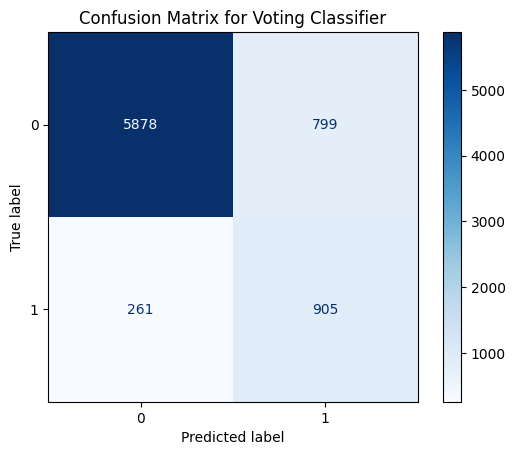

In [64]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# Preprocessing Test Data

In [65]:
#converting the test data in dataframe
X_t=pd.DataFrame(Test)

In [66]:
X_t.isnull().sum()
#we can see the number of missing value in column

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

In [67]:
X_t

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2010-11-20,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN
9996,2009-06-03,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN
9997,2010-04-20,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN
9998,2010-02-17,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN


In [68]:
#applying similar steps in test data
X_t['last contact date'] = pd.to_datetime(X_t['last contact date'])

X_t['Year'] = X_t['last contact date'].dt.year
X_t['Month'] = X_t['last contact date'].dt.month
X_t['Day'] = X_t['last contact date'].dt.day

In [69]:
X_t = X_t.drop(columns=['Year','last contact date'])

In [70]:
X_t

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Month,Day
0,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN,11,21
1,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN,2,4
2,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN,7,28
3,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN,6,9
4,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN,11,20
9996,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN,6,3
9997,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN,4,20
9998,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN,2,17


In [71]:
#Transforming the test set with the help of preprocessor. This will make sure our test data is
#preprocess and transformed correctly.
x_t_p=preprocessor.transform(X_t)

In [72]:
x_t_p

,num__age,num__balance,num__duration,num__campaign,num__pdays,num__previous,num__Month,num__Day,cat__job_blue-collar,cat__job_entrepreneur,...,cat__marital_married,cat__marital_single,cat__education_secondary,cat__education_tertiary,cat__default_yes,cat__housing_yes,cat__loan_yes,cat__contact_telephone,cat__poutcome_other,cat__poutcome_success
0,-0.484988,-0.331874,-0.544610,-0.415218,-0.455273,-0.266769,1.829308,0.621892,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.956309,-0.266878,-0.469076,-0.314310,-0.455273,-0.266769,-1.622248,-1.413670,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.799202,-0.327275,-0.458658,-0.112495,-0.455273,-0.266769,0.295283,1.460064,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.327882,-0.241125,-0.138290,-0.314310,-0.455273,-0.266769,-0.088223,-0.814975,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.321739,-0.312988,0.199007,-0.415218,0.653564,-0.221388,-1.238742,-1.653147,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.327882,0.216669,-0.178662,-0.415218,-0.455273,-0.266769,1.829308,0.502153,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,-1.270522,-0.312866,0.670442,-0.415218,-0.455273,-0.266769,-0.088223,-1.533408,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,-1.270522,-0.321205,-0.364892,-0.314310,-0.455273,-0.266769,-0.855236,0.502153,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,-0.799202,-0.313172,-0.268521,-0.314310,-0.455273,-0.266769,-1.622248,0.142936,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
x_t_p.isnull().sum()

num__age                    0
num__balance                0
num__duration               0
num__campaign               0
num__pdays                  0
num__previous               0
num__Month                  0
num__Day                    0
cat__job_blue-collar        0
cat__job_entrepreneur       0
cat__job_housemaid          0
cat__job_management         0
cat__job_retired            0
cat__job_self-employed      0
cat__job_services           0
cat__job_student            0
cat__job_technician         0
cat__job_unemployed         0
cat__marital_married        0
cat__marital_single         0
cat__education_secondary    0
cat__education_tertiary     0
cat__default_yes            0
cat__housing_yes            0
cat__loan_yes               0
cat__contact_telephone      0
cat__poutcome_other         0
cat__poutcome_success       0
dtype: int64

# Predicting in test data with my best model 

In [74]:
y_pred =voting_clf.predict(x_t_p)

In [75]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [76]:
#We see the count of 0 and 1 in our prediction
num_zeros = y_pred.size - np.count_nonzero(y_pred)
num_ones = np.count_nonzero(y_pred == 1)

print(f"Number of zeros: {num_zeros}")
print(f"Number of ones: {num_ones}")

Number of zeros: 7894
Number of ones: 2106


In [77]:
#Convert 0 and 1 to 'no' and 'yes'
y_pred_n=np.where(y_pred == 1, 'yes', 'no')

In [78]:
#With this code I recheck the count of 'yes' and 'no' which is matching with previous.
num_yes = np.count_nonzero(y_pred_n == 'yes')
num_no = np.count_nonzero(y_pred_n == 'no')

print(f"Count of 'yes': {num_yes}")
print(f"Count of 'no': {num_no}")


Count of 'yes': 2106
Count of 'no': 7894


# Creating output file to submit in competition 

In [79]:
submission = pd.DataFrame({"id": range(0,X_t.shape[0]), 
                           "target": y_pred_n}) 

submission.to_csv('submission.csv',index=False)